In [1]:
#作业三-参数估计&非参数估计
#计算机科学与技术
#2012009
#李彦泽

In [2]:
import numpy as np
import pandas as pd
import sys
import math
import operator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# 生成正态分布数据

def Generate_Sample_Gaussian(mean, cov, P, label):
    '''
        mean 为均值向量
        cov 为方差矩阵a
        P 为单个类的先验概率
        return 单个类的数据集
    '''
    temp_num = round(1200 * P)
    x, y = np.random.multivariate_normal(mean, cov, temp_num).T
    z = np.ones(temp_num) * label
    X = np.array([x, y, z])
    return X.T

In [4]:
#初始数据处理

def Generate_DataSet(mean, cov, P):
    X = []
    label = 1
    for i in range(3):
        X.extend(Generate_Sample_Gaussian(mean[i], cov, P[i], label))
        label += 1
        i = i + 1
    return X

In [5]:
#生成数据可视化

def Generate_DataSet_plot(mean, cov, P):
    xx = []
    label = 1
    for i in range(3):
        xx.append(Generate_Sample_Gaussian(mean[i], cov, P[i], label))
        label += 1
        i = i + 1
    plt.figure()
    for i in range(3):
        plt.plot(xx[i][:, 0], xx[i][:, 1], '.', markersize=4.)
        plt.plot(mean[i][0], mean[i][1], 'r*')
    plt.show()
    return xx

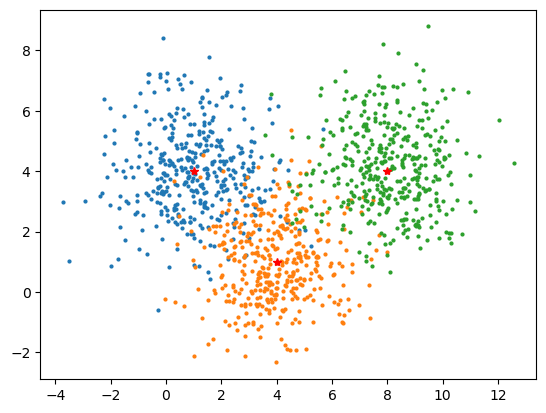

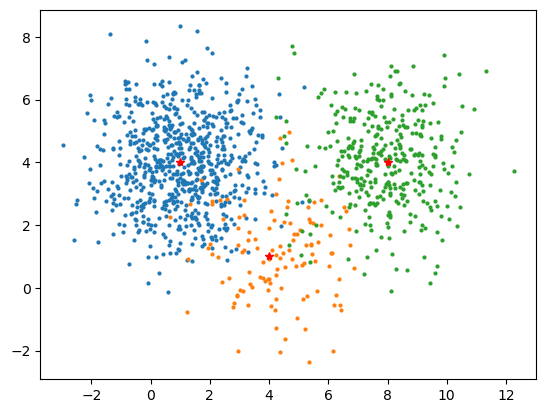

In [6]:
mean = np.array([[1, 4], [4, 1], [8, 4]])  # 均值数组
cov = [[2, 0], [0, 2]]                     # 方差矩阵
num = 1200                                 # 样本个数
P1 = [1 / 3, 1 / 3, 1 / 3]                 # 样本X1的先验概率
P2 = [0.6, 0.1, 0.3]                       # 样本X2的先验概率
X1 = np.array(Generate_DataSet_plot(mean, cov, P1), dtype=object)
X2 = np.array(Generate_DataSet_plot(mean, cov, P2), dtype=object)
X1 = np.vstack(X1)
X2 = np.vstack(X2)

In [13]:
#二元高斯分布概率密度函数计算

def Gaussian_function(x, mean, cov):
    det_cov = np.linalg.det(cov) 
    inv_cov = np.linalg.inv(cov) 
    p = 1/(2 * np.pi * np.sqrt(det_cov)) * np.exp(-0.5 * np.dot(np.dot((x - mean), inv_cov), (x - mean)))
    return p

In [14]:
#似然率测试函数

def likelyhoody_cal(X, mean, cov, p):

    error_rate = 0
    
    for i in range(num):
        temp = np.zeros(3)
        for j in range(mean.shape[0]):
            temp[j] = Gaussian_function(X[i][0:2], mean[j], cov)  
        predictClass = np.argmax(temp) + 1                            
        if predictClass != X[i][2]:                                  
            error_rate += 1
    
    return round(error_rate / num, 3)

In [15]:
#最大后验概率规则

def max_posterior_cal(X, mean, cov, p):
    
    error_rate = 0
    
    for i in range(np.array(X).shape[0]):
        temp = np.zeros(3)
        for j in range(mean.shape[0]):
            temp[j] = Gaussian_function(X[i][0:2], mean[j], cov) * p[j] 
        predictClass = np.argmax(temp) + 1                              
        if predictClass != X[i][2]:
            error_rate += 1
    
    return round(error_rate / np.array(X).shape[0], 3)

In [16]:
#结果输出

print("X1误差: 极大似然规则{}  最大后验规则{}".format(likelyhoody_cal(X1, mean, cov, P1), max_posterior_cal(X1, mean, cov, P1)))
print("X2误差: 极大似然规则{}  最大后验规则{}".format(likelyhoody_cal(X2, mean, cov, P2), max_posterior_cal(X2, mean, cov, P2)))

X1误差: 极大似然规则0.081  最大后验规则0.081
X2误差: 极大似然规则0.066  最大后验规则0.044


In [17]:
#结果分析

#当每个类的先验概率P相同或差别不大时，极大似然率测试规则和最大后验概率规则分类结果相差不大
#当先验概率相差较大时，极大似然率规则更好一些

In [18]:
#高斯核概率密度函数计算

def Gaussian_kernel(x, X, h=2):
    p = (1 / (np.sqrt(2 * np.pi) * h)) * np.array([np.exp(-0.5 * np.dot(x - X[i], x - X[i]) / (h**2)) for i in range(len(X))]).mean()
    return p

In [19]:
#似然率测试函数

def likelyhood_kernel_cal(X, x, h):

    error_rate = 0
    x1=[]
    x2=[]
    x3=[]
    
    for i in range(np.array(X).shape[0]):
        if X[i][2]==1:
            x1.append(X[i][0:2])
        elif X[i][2]==2:
            x2.append(X[i][0:2])
        elif X[i][2]==3:
            x3.append(X[i][0:2])
    
    for i in range(np.array(x).shape[0]):
        temp = np.zeros(3)
        temp[0] = Gaussian_kernel(x[i][0:2], x1, h)
        temp[1] = Gaussian_kernel(x[i][0:2], x2, h)
        temp[2] = Gaussian_kernel(x[i][0:2], x3, h) 
        predictClass = np.argmax(temp) + 1      
        if predictClass != x[i][2]:
            error_rate += 1
    
    return error_rate / np.array(x).shape[0]

In [20]:
#结果输出

print("X1误差:  {}".format(likelyhood_kernel_cal(X1,X1,1)))
print("X2误差:  {}".format(likelyhood_kernel_cal(X2,X2,1)))

X1误差:  0.08083333333333333
X2误差:  0.065


In [21]:
#五折交叉验证

def classify_try(x, flag):
    
    np.random.shuffle(x)
    n = 5
    global s1,s2,s3,s4,s5
    
    for i in range(5):
        x_tmp = x[math.floor(i / n * len(x)): math.floor((i + 1) / n * len(x))]
        if flag == 1:
            if i == 0:
                s1=x_tmp
            if i == 1:
                s2=x_tmp
            if i == 2:
                s3=x_tmp
            if i == 3:
                s4=x_tmp
            if i == 4:
                s5=x_tmp
        else:
            if i == 0:
                s1 = np.concatenate((s1, x_tmp), axis = 0)
            if i == 1:
                s2 = np.concatenate((s2, x_tmp), axis = 0)
            if i == 2:
                s3 = np.concatenate((s3, x_tmp), axis = 0)
            if i == 3:
                s4 = np.concatenate((s4, x_tmp), axis = 0)
            if i == 4:
                s5 = np.concatenate((s5, x_tmp), axis = 0) 

In [22]:
x1=[]
x2=[]
x3=[]
for i in range(num):
    if X2[i][2]==1:
        x1.append(X2[i])
    elif X2[i][2]==2:
        x2.append(X2[i])
    elif X2[i][2]==3:
        x3.append(X2[i])

classify_try(x1, 1)
classify_try(x2, 0)
classify_try(x3, 0)

In [23]:
#错误概率计算

def err_cal(h):
    
    data_temp = []
    error = 0
    data_test = []
    
    for i in range(5):
        if i == 0:
            data_temp = np.concatenate((s2, s3, s4, s5)) 
            data_test = s1
        if i == 1:
            data_temp = np.concatenate((s1, s3, s4, s5))
            data_test = s2
        if i == 2:
            data_temp = np.concatenate((s1, s2, s4, s5))
            data_test = s3
        if i == 3:
            data_temp = np.concatenate((s1, s2, s3, s5))
            data_test = s4
        if i == 4:
            data_temp = np.concatenate((s1, s2, s3, s4)) 
            data_test = s5
        error += likelyhood_kernel_cal(data_temp, np.array(data_test), h)
        
    return error / 5

In [24]:
#输出结果

tmp = [0.1, 0.5, 1.0, 1.5, 2.0]
for i in tmp:
    res = err_cal(i)
    res = np.around(res, 5)
    print("h = {}时, res = {}".format(i, res))

h = 0.1时, res = 0.07583
h = 0.5时, res = 0.07083
h = 1.0时, res = 0.06417
h = 1.5时, res = 0.0625
h = 2.0时, res = 0.06333


In [10]:
#获得相邻点及距离

def get_neighbors(x, y, X, k):
    
    distance=[]
    neighbors = []
    r = 0
    
    for i in range(np.array(X).shape[0]):
        temp = math.pow((X[i][0]-x),2) + math.pow((X[i][1]-y),2)
        temp = math.sqrt(temp)
        distance.append((X[i],temp))
    distance.sort(key = operator.itemgetter(1))
    for i in range(k):
        neighbors.append(distance[i][0])
        if i == k-1:
            r = distance[i][1]

    return neighbors, r

In [11]:
#KNN计算

def KNN(X, k):
    
    p = np.zeros((200, 200, 3))
    
    for i in np.arange(0, 200):
        for j in np.arange(0, 200):
            x_temp = -5 + 0.1 * i
            y_temp = -5 + 0.1 * j
            kneighbor, r = get_neighbors(x_temp, y_temp, X, k)
            V = math.pi * r * r
            p_temp = [0,0,0]
            for t in range(k):
                p_temp[int(kneighbor[t][2]) - 1] += 1
            for q in range(3):
                p[i][j][q] = p_temp[q] / (200 * 200 * V)
            
    return p

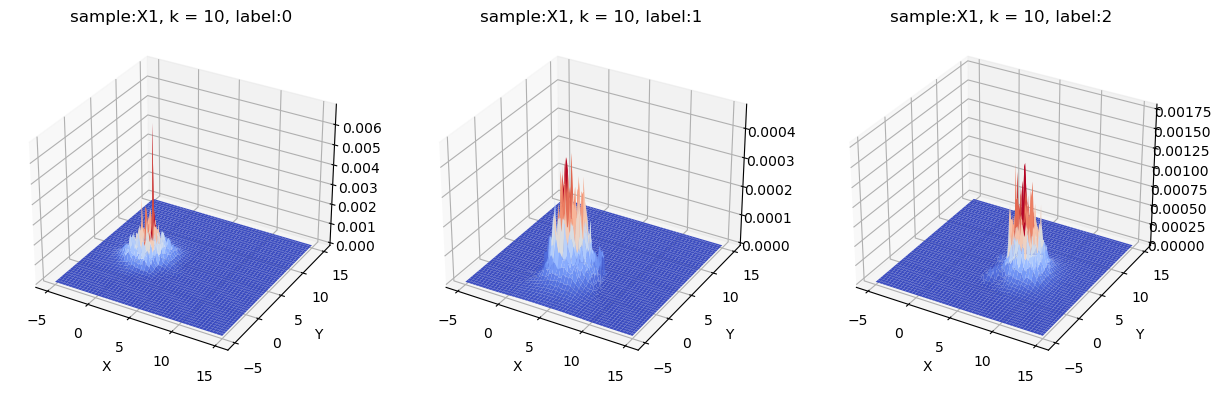

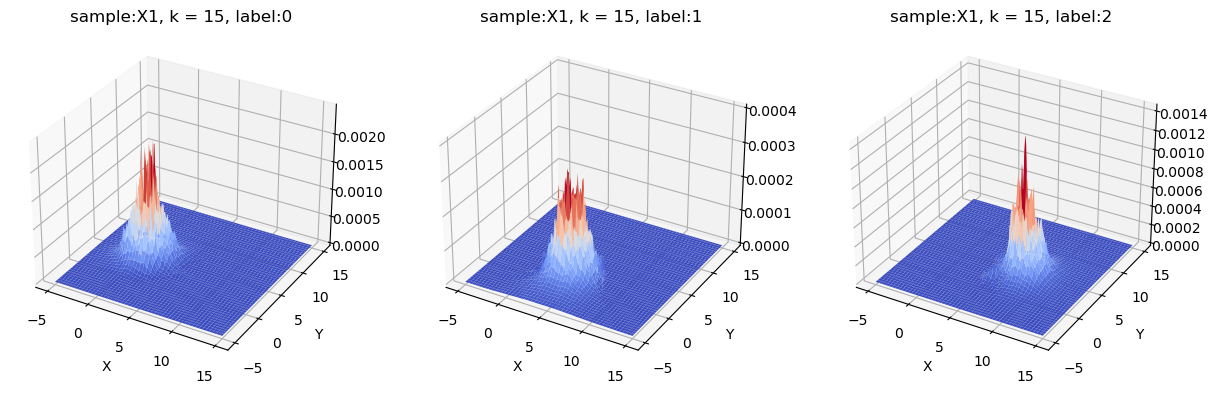

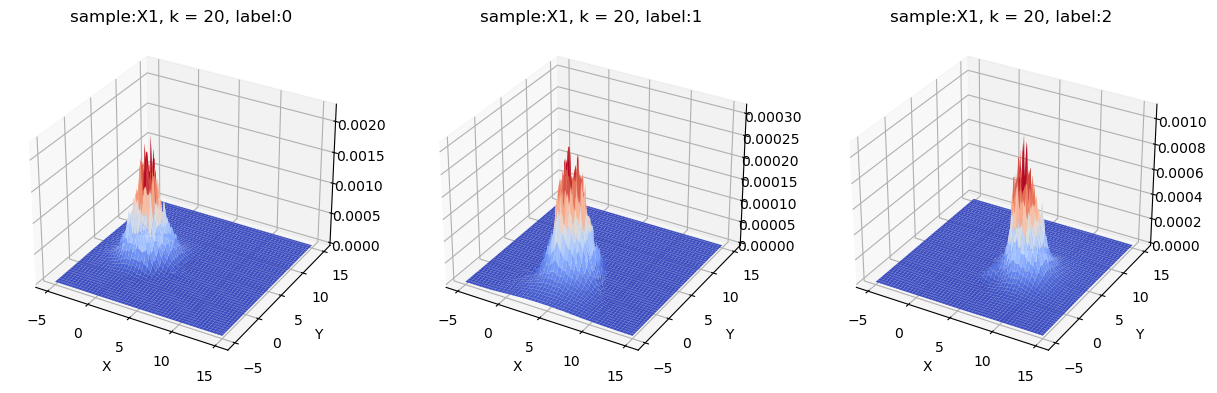

In [12]:
#结果可视化

k = [10, 15, 20]

for i in k:
    p = KNN(X2, i)  # 获得概率密度估计

    # 高级要求1
    X, Y = np.mgrid[-5:15:200j, -5:15:200j]

    Z0 = p[:, :, 0]
    Z1 = p[:, :, 1]
    Z2 = p[:, :, 2]
    
    fig = plt.figure(figsize=(15,5))
    ax = plt.subplot(1, 3, 1, projection = '3d')
    ax.plot_surface(X, Y, Z0, cmap = plt.cm.coolwarm)
    ax.set_title("sample:X1, k = {}, label:0".format(i))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax = plt.subplot(1, 3, 2, projection = '3d')
    ax.plot_surface(X, Y, Z1, cmap = plt.cm.coolwarm)
    ax.set_title("sample:X1, k = {}, label:1".format(i))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax = plt.subplot(1, 3, 3, projection = '3d')
    ax.plot_surface(X, Y, Z2, cmap = plt.cm.coolwarm)
    ax.set_title("sample:X1, k = {}, label:2".format(i))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()